In [3]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
N = 5000
model = models.Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(N, 4)))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.3))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['mae'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4996, 32)          672       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 999, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 995, 32)           5152      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 12,097
Trainable params: 12,097
Non-trainable param

In [5]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
n=100
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(n,n,3))) # input_shape
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

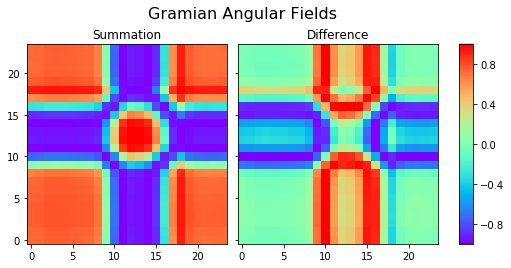

In [29]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

# Parameters
X, _, _, _ = load_gunpoint(return_X_y=True)

# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=24, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=24, method='difference')
X_gadf = gadf.fit_transform(X)

# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()

In [30]:
print(X.shape)

(50, 150)


In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
import pandas as pd
import numpy as np
N = 5000
n = 100

train_gasf = np.zeros((1,n,n,1))
train_gadf = np.zeros((1,n,n,1))
X = np.zeros((1,n,n,3))

for k in range(7):
    for i in data[k]:
        for j in range(cycle[i-1]):
            train = pd.read_csv('C:/Users/Na Kyungmi/OneDrive - postech.ac.kr/문서/대학교/그 외/카이스트연구참여/Battery Data/Randomized Battery Usage Data Set/Extract_data/raw data/'+str(k+1)+'/RW'+str(i)+'/Cycle'+str(j+1)+'.csv', encoding='CP949')
            train = train.to_numpy()
            Y = np.vstack([Y, train[0,0]])
            train_diff = np.hstack([train[:, 2:4], train[:,6].reshape((5000,-1))])
            
            for j in range(n): # sampling
                interval = N/n
                X_samp = train_diff[j*interval,:]
                
            for i in range(3): # gramian angular field
                gasf = GramianAngularField(method='summation')
                X_gasf = gasf.fit_transform(X_samp[:,i].reshape((1,n)))
                gadf = GramianAngularField(method='difference')
                X_gadf = gadf.fit_transform(X_samp[:,i].reshape((1,n))) # output dimension (1,n,n)
                
                X_gasf = X_gasf.reshape(1,n,n,1)
                X_gadf = X_gadf.reshape(1,n,n,1)
                
                train_gasf = np.stack((train_gasf,X_gasf), axis=3) # last output dimension (1,n,n,4)
                train_gadf = np.stack((train_gadf,X_gadf) axis=3)
                
            train_gasf = train_gasf[:,:,:,1:]
            train_gadf = train_gadf[:,:,:,1:]
            X_gasf = np.stack((X, train_gasf), axis=0)
            X_gadf = np.stack((X, train_gadf), axis=0)




(1, 5000)


In [34]:
a = np.array([[1],[2],[3]])
b = np.array([[2],[3],[4]])
c = np.dstack((a,b))
print(a.shape)
print(c.shape)

(3, 1)
(3, 1, 2)


In [32]:
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

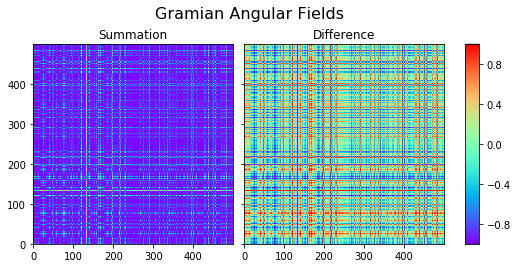

In [33]:
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()

In [35]:
print(X_gasf.shape)

(1, 500, 500)


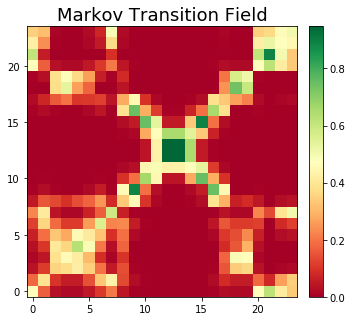

In [16]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField
from pyts.datasets import load_gunpoint

X, _, _, _ = load_gunpoint(return_X_y=True)

# MTF transformation
mtf = MarkovTransitionField(image_size=24)
X_mtf = mtf.fit_transform(X)

# Show the image for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_mtf[0], cmap='RdYlGn', origin='lower') # cmap에는 gray, rainbow, Reds, Blues, autumn, RdYlGn, 
plt.title('Markov Transition Field', fontsize=18)
plt.colorbar(fraction=0.0457, pad=0.04)
plt.tight_layout()
plt.show()

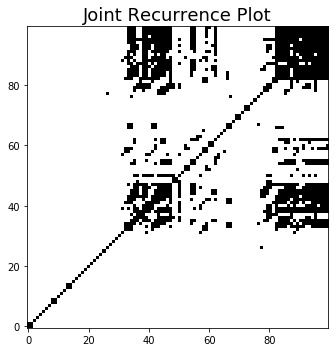

In [6]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from pyts.multivariate.image import JointRecurrencePlot
from pyts.datasets import load_basic_motions

X, _, _, _ = load_basic_motions(return_X_y=True)

# Recurrence plot transformation
jrp = JointRecurrencePlot(threshold='point', percentage=50)
X_jrp = jrp.fit_transform(X)

# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_jrp[0], cmap='binary', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()

In [12]:
print(X_jrp[0])

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


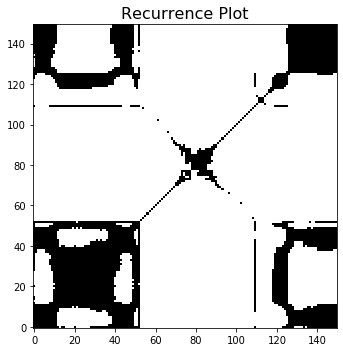

In [4]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

X, _, _, _ = load_gunpoint(return_X_y=True)

# Recurrence plot transformation
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)

# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
print(X_rp.shape)

(50, 150, 150)


In [ ]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from pyts.multivariate.image import JointRecurrencePlot
from pyts.datasets import load_basic_motions

X, _, _, _ = load_basic_motions(return_X_y=True)

# Recurrence plot transformation
jrp = JointRecurrencePlot(threshold='point', percentage=50)
X_jrp = jrp.fit_transform(X)

# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_jrp[0], cmap='binary', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()

In [3]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

N = 5000

model = models.Sequential()
model.add(layers.LSTM(32, input_shape=(N, 4)))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4736      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [1]:
import numpy

def matrix_tutorial(A):

    # 2
    B = A.transpose()
    try:
        C = numpy.linalg.inv(B)
        result = numpy.sum(C>0)
    except:
        result = 'not invertible'

    # 4
    return result

def get_matrix():
    # 1
    mat = [] # define mat variable

    first_line = input().strip() # receice first line
    first_line_splitted = first_line.split(" ") # split line by space " "
    n = int(first_line_splitted[0]) # convert to integer
    m = int(first_line_splitted[1]) # convert to integer

    for i in range(n):
        line = input().strip() # receive each line ...
        row = line.split(" ")  # ... and split
        for j in range(m):
            row[j] = int(row[j]) # convert to integer
        mat.append(row)

    return numpy.array(mat)

if __name__ == "__main__":
    A = get_matrix()
    print(matrix_tutorial(A))

3 5
1 2 6 3 8
11 0 -1 3 1
9 0 7 -3 4
not invertible


In [4]:
import numpy

def main():
	(N, X, Y) = read_data()
	print(N)
	print(X)
	print(Y)

def read_data():
	# Implement here
	X = []
	Y = []
	N = input('How many data do you have?')
	N = int(N)
	for i in range(N):
		point = input().strip()
		data = point.split(" ")
		x = float(data[0])
		y = float(data[1])
		X.append(x)
		Y.append(y)
		

	return (N, X, Y)

if __name__ == "__main__":
	main()

How many data do you have?3
1 5
2 10
3 15
3
[1.0, 2.0, 3.0]
[5.0, 10.0, 15.0]


In [3]:
import numpy
import statsmodels.api

def main():
    (N, X, Y) = read_data()
    results = do_simple_regression(N, X, Y)
    print(results.pvalues())
    #visualize(X, Y, results)

def read_data():
    # 1
    # Copy-and-paste your code from the previous exercise
    X = []
    Y = []
    N = input('How many data do you have?')
    N = int(N)
    for i in range(N):
        point = input().strip()
        data = point.split(" ")
        x = float(data[0])
        y = float(data[1])
        X.append(x)
        Y.append(y)
    return (N, X, Y)

def do_simple_regression(N, X, Y):
    # 2
    Y = numpy.array(Y)
    X = numpy.array(X).T
    X = statsmodels.api.add_constant(X)
    results = statsmodels.api.OLS(Y,X).fit()
    return results
    
def visualize(X, Y, results):
    import matplotlib as mpl
    mpl.use("Agg")
    import matplotlib.pyplot as plt
    import numpy

    slope = results.params[1]
    intercept = results.params[0]

    plt.scatter(X, Y)
    reg_line_x = numpy.array([min(X), max(X)])
    reg_line_y = reg_line_x * slope + intercept
    plt.plot(reg_line_x, reg_line_y, color='r')

    plt.savefig("image.svg", format="svg")

if __name__ == "__main__":
    main()

How many data do you have?5
1 1
2 4
3 9
4 16
5 25


TypeError: 'numpy.ndarray' object is not callable

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framewo

17465344/17464789 [==============================] - 13s 1us/step


In [9]:
#decode the review

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [22]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history


Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.5296 - acc: 0.7790 - val_loss: 0.4193 - val_acc: 0.8421
Epoch 2/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.3178 - acc: 0.9013 - val_loss: 0.3108 - val_acc: 0.8840
Epoch 3/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.2288 - acc: 0.9247 - val_loss: 0.2796 - val_acc: 0.8900
Epoch 4/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1796 - acc: 0.9398 - val_loss: 0.2739 - val_acc: 0.8906
Epoch 5/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1464 - acc: 0.9520 - val_loss: 0.2791 - val_acc: 0.8897
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1183 - acc: 0.9647 - val_loss: 0.2960 - val_acc: 0.8862
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 

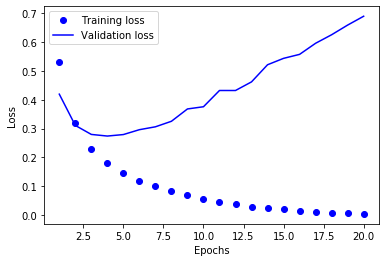

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+
               1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

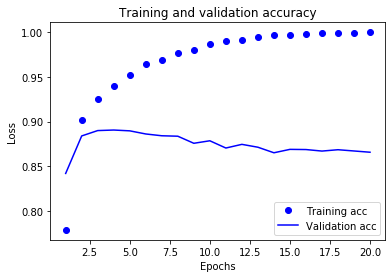

In [18]:
plt.clf() #그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
results = model.evaluate(x_test, y_test)
print(results)

print(model.predict(x_test))

25000/25000 [==============================] - 2s 89us/step
[0.7704075304341316, 0.85088]
[[2.6760995e-03]
 [9.9999988e-01]
 [9.6426600e-01]
 ...
 [8.7466836e-04]
 [3.9074719e-03]
 [6.6073549e-01]]


In [29]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [30]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


In [31]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [41]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [43]:
import matplotlib.pyplot as plt

average_mae_history=[np.mean]
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

NameError: name 'average_mae_history' is not defined

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

Using TensorFlow backend.
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framewo

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.1813 - acc: 0.9437
Epoch 2/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.0481 - acc: 0.9854
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0334 - acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0252 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0205 - acc: 0.9936


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 1s 56us/step
0.9931


In [9]:
import os, shutil

original_dataset_dir = 'C:/Users/Na Kyungmi/Downloads/006975-master/datasets/cats_and_dogs/train'

base_dir = 'C:/Users/Na Kyungmi/Downloads/006975-master/datasets/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('훈련용 고양이 이미지 전체 개수 :', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수 : 1000


In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
# Data preprocessing

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6879 - acc: 0.5405 - val_loss: 0.6711 - val_acc: 0.5750
Epoch 2/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6524 - acc: 0.6175 - val_loss: 0.6453 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6264 - acc: 0.6405 - val_loss: 0.6231 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5814 - acc: 0.6975 - val_loss: 0.6144 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5476 - acc: 0.7230 - val_loss: 0.5684 - val_acc: 0.6990
Epoch 6/30
100/100 [==============================] - 7s 65ms/step - loss: 0.5177 - acc: 0.7390 - val_loss: 0.5722 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 7s 68ms/step - loss: 0.4880 - acc: 0.7575 - val_loss: 0.5521 - val_acc: 0.7060
Epoch 8/30
100/100 [==============================] - 7s 74ms/step - 

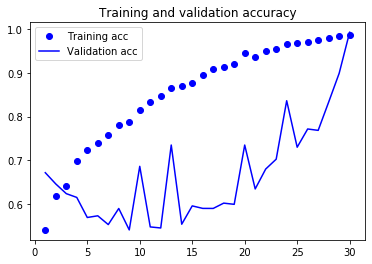

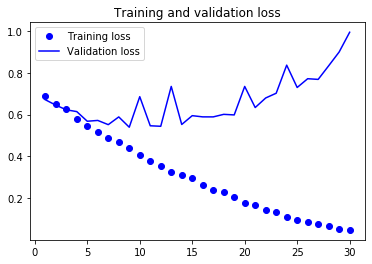

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc: ', test_acc)

Found 1000 images belonging to 2 classes.
test acc:  0.7480000007152557


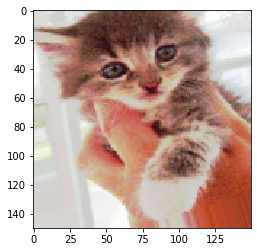

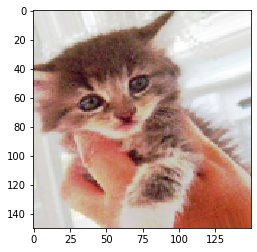

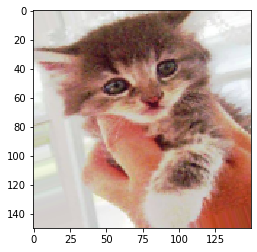

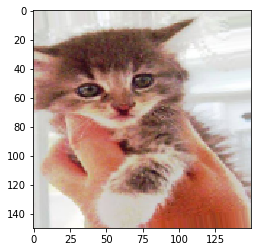

In [19]:
# image argumentation

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,)+x.shape) # batch 차원을 추가하여 4D 텐서를 생성

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [20]:
# dropout 층 생성

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_dategen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 232ms/step - loss: 0.6886 - acc: 0.5287 - val_loss: 0.6705 - val_acc: 0.5850
Epoch 2/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6749 - acc: 0.5712 - val_loss: 0.6976 - val_acc: 0.5296
Epoch 3/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6625 - acc: 0.5909 - val_loss: 0.6403 - val_acc: 0.6174
Epoch 4/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6441 - acc: 0.6131 - val_loss: 0.6143 - val_acc: 0.6501
Epoch 5/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6338 - acc: 0.6366 - val_loss: 0.6014 - val_acc: 0.6675
Epoch 6/100
100/100 [==============================] - 22s 221ms/step - loss: 0.6084 - acc: 0.6669 - val_loss: 0.6169 - val_acc: 0.6153
Epoch 7/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6004 - acc: 0.6678 -

Epoch 60/100
100/100 [==============================] - 20s 199ms/step - loss: 0.4101 - acc: 0.8047 - val_loss: 0.4689 - val_acc: 0.7976
Epoch 61/100
100/100 [==============================] - 20s 203ms/step - loss: 0.4187 - acc: 0.8087 - val_loss: 0.5290 - val_acc: 0.7680
Epoch 62/100
100/100 [==============================] - 21s 208ms/step - loss: 0.4092 - acc: 0.8172 - val_loss: 0.5027 - val_acc: 0.7659
Epoch 63/100
100/100 [==============================] - 20s 203ms/step - loss: 0.4008 - acc: 0.8178 - val_loss: 0.4386 - val_acc: 0.8119
Epoch 64/100
100/100 [==============================] - 20s 201ms/step - loss: 0.4037 - acc: 0.8169 - val_loss: 0.4167 - val_acc: 0.8170loss: 0.4
Epoch 65/100
100/100 [==============================] - 20s 203ms/step - loss: 0.3967 - acc: 0.8181 - val_loss: 0.4478 - val_acc: 0.8027
Epoch 66/100
100/100 [==============================] - 20s 205ms/step - loss: 0.3977 - acc: 0.8163 - val_loss: 0.4209 - val_acc: 0.8054
Epoch 67/100
100/100 [==========

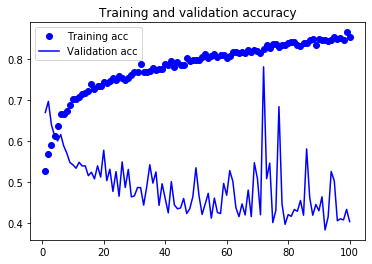

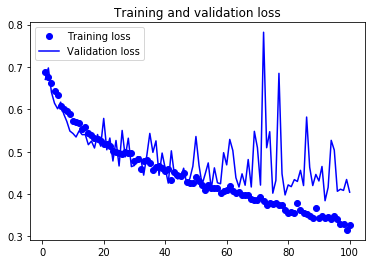

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

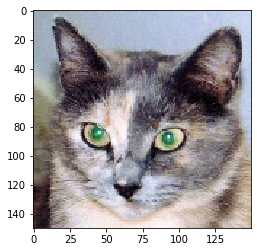

In [27]:
img_path='C:/Users/Na Kyungmi/Downloads/006975-master/datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

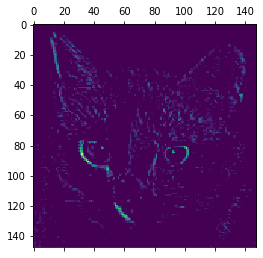

In [29]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

plt.matshow(first_layer_activation[0,:,:,19], cmap='viridis')

In [3]:
import numpy as np

samples = ['The cat sat on the dog.', 'The dog ate my homework.']

token_index = {} # 텍스트에 있는 모든 토큰의 인덱스를 구축
for sample in samples:
    for word in sample.split():
        print(word)
        if word not in token_index:
            token_index[word] = len(token_index)+1
            
max_length = 10

results = np.zeros(shape=(len(samples),
                         max_length,
                         max(token_index.values())+1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1.
        
        
print(results)

The
cat
sat
on
the
dog.
The
dog
ate
my
homework.
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [8]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다. ' % len(word_index))

print(one_hot_results.shape)

9개의 고유한 토큰을 찾았습니다. 
(2, 1000)


In [9]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i,j,index] = 1.
        
print(results.shape)

(2, 10, 1000)


In [12]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트 길이
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기 : ', input_train.shape)
print('input_test 크기 : ', input_test.shape)



데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기 :  (25000, 500)
input_test 크기 :  (25000, 500)


In [14]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size=128, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5771 - acc: 0.6880 - val_loss: 0.4167 - val_acc: 0.8234
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3602 - acc: 0.8531 - val_loss: 0.3654 - val_acc: 0.8418
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2858 - acc: 0.8860 - val_loss: 0.3454 - val_acc: 0.8612
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2403 - acc: 0.9082 - val_loss: 0.3857 - val_acc: 0.8326
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1878 - acc: 0.9317 - val_loss: 0.3681 - val_acc: 0.8452
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1378 - acc: 0.9493 - val_loss: 0.4696 - val_acc: 0.7940
Epoch 7/1

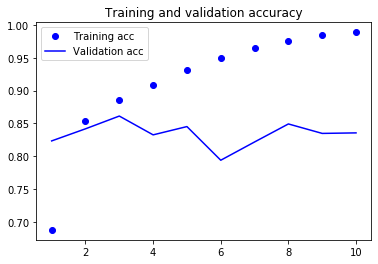

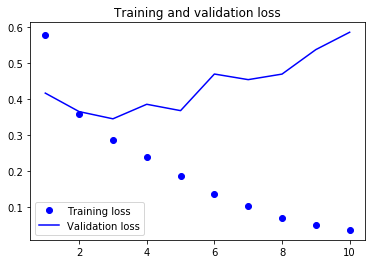

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 정확도가 일반 신경망보다 높지 않은 이유 : 전체 시퀀스를 사용하지 않기 때문 / simpleRNN이 텍스트처럼 긴 시퀀스를 처리하는 데 적합하지 않기 때문

In [16]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.5225 - acc: 0.7519 - val_loss: 0.4189 - val_acc: 0.8428
Epoch 2/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2952 - acc: 0.8851 - val_loss: 0.3476 - val_acc: 0.8552
Epoch 3/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2324 - acc: 0.9125 - val_loss: 0.3070 - val_acc: 0.8714
Epoch 4/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2018 - acc: 0.9240 - val_loss: 0.4446 - val_acc: 0.8696
Epoch 5/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1789 - acc: 0.9348 - val_loss: 0.3093 - val_acc: 0.8902
Epoch 6/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1626 - acc: 0.9425 - val_loss: 0.2951 - val_acc: 0.8836
Epoch 7/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1416 - acc: 0.9500 - val_loss: 0.3066 - val_acc:

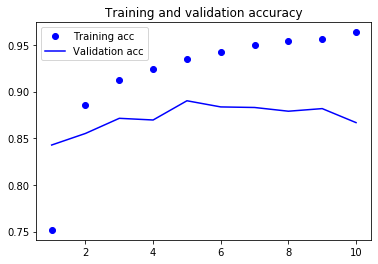

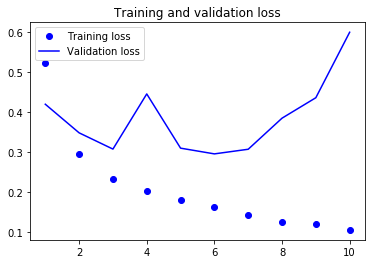

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [1]:
# 기온 예측 문제

import os

data_dir = 'C:/Users/Na Kyungmi/Downloads/006975-master/datasets/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f=open(fname)
data=f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


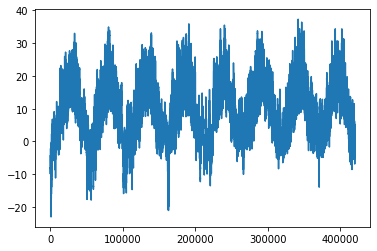

In [2]:
import numpy as np

float_data = np.zeros((len(lines), len(header)-1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i,:] = values
    
from matplotlib import pyplot as plt

temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

14


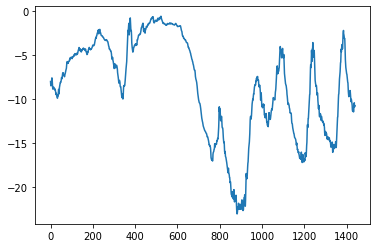

In [3]:
plt.plot(range(1440), temp[:1440])

print(float_data.shape[-1])

In [3]:
# 데이터 정규화

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

# generator 함수

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index+lookback, max_index, size=batch_size)
        else:
            if i+ batch_size >= max_index :
                i = min_index + lookback
            rows = np.arange(i, min(i+batch_size, max_index))
            i += len(rows)
                
        samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j]-lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j]+delay][1]
        yield samples, targets

In [4]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                     delay=delay,
                     min_index=0,
                     max_index=200000,
                     shuffle=True,
                     step=step,
                     batch_size=batch_size)
val_gen = generator(float_data,
                   lookback=lookback,
                   delay=delay,
                   min_index=200001,
                   max_index=300000,
                   step=step,
                   batch_size=batch_size)
test_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data)-300001-lookback) // batch_size

In [5]:
# 상식 수준의 기준점

def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:,-1,1]
        mae = np.mean(np.abs(np.abs(preds-targets)))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
        
evaluate_naive_method()

0.2897359729905486


In [58]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback//step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                             epochs=20,
                             validation_data=val_gen,
                             validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 10s 21ms/step - loss: 1.2253 - val_loss: 0.8059
Epoch 2/20
500/500 [==============================] - 10s 20ms/step - loss: 0.4477 - val_loss: 0.3458
Epoch 3/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2979 - val_loss: 0.3261
Epoch 4/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2694 - val_loss: 0.3155
Epoch 5/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2563 - val_loss: 0.3178
Epoch 6/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2457 - val_loss: 0.3109
Epoch 7/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2395 - val_loss: 0.3115
Epoch 8/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2336 - val_loss: 0.3365
Epoch 9/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2288 - val_loss: 0.3787
Epoch 10/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2252 - val

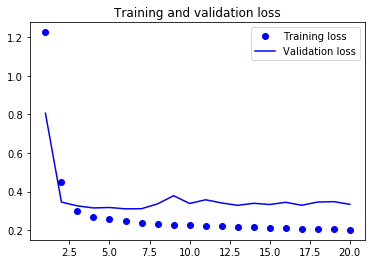

In [61]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 상식 수준의 모델은 loss가 0.29

In [6]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Using TensorFlow backend.
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framewo

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
500/500 [==============================] - 116s 232ms/step - loss: 0.3033 - val_loss: 0.2743
Epoch 2/20
500/500 [==============================] - 115s 230ms/step - loss: 0.2850 - val_loss: 0.2678
Epoch 3/20
500/500 [==============================] - 118s 236ms/step - loss: 0.2774 - val_loss: 0.2630
Epoch 4/20
500/500 [==============================] - 118s 236ms/step - loss: 0.2718 - val_loss: 0.2658
Epoch 5/20
500/500 [==============================] - 114s 228ms/step - loss: 0.2683 - val_loss: 0.2689
Epoch 6/20
500/500 [==============================] - 116s 231ms/step - loss: 0.2621 - val_loss: 0.2686
Epoch 7/20
500/500 [==============================] - 114s 227ms/step - loss: 0.2572 - val_loss: 0.2711
Epoch 8/20
500/500 [==============================] - 114s 228ms/step - loss: 0.2518 - val_loss: 0.2786
Epoch 9/20
500/500 [============================

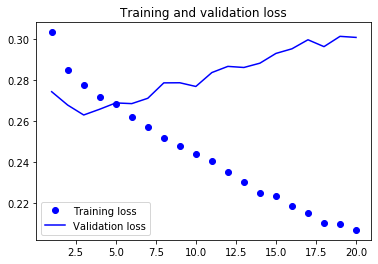

In [7]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
# 과대적합을 막기 위해 dropout 규제

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 131s 261ms/step - loss: 0.3394 - val_loss: 0.2840
Epoch 2/40
500/500 [==============================] - 125s 250ms/step - loss: 0.3159 - val_loss: 0.2763
Epoch 3/40
500/500 [==============================] - 131s 262ms/step - loss: 0.3100 - val_loss: 0.2696
Epoch 4/40
500/500 [==============================] - 131s 263ms/step - loss: 0.3038 - val_loss: 0.2693
Epoch 5/40
500/500 [==============================] - 129s 258ms/step - loss: 0.3014 - val_loss: 0.2704
Epoch 6/40
500/500 [==============================] - 129s 259ms/step - loss: 0.2979 - val_loss: 0.2677
Epoch 7/40
500/500 [==============================] - 127s 254ms/step - loss: 0.2927 - val_loss: 0.2695
Epoch 8/40
500/500 [==============================] - 126s 252ms/step - loss: 0.2926 - val_loss: 0.2654
Epoch 9/40
500/500 [==============================] - 126s 252ms/step - loss: 0.2901 - val_loss: 0.2644
Epoch 10/40
500/500 [==============================] - 132s 264m

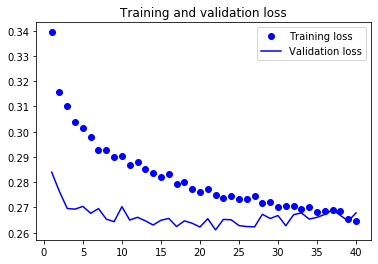

In [11]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
# 스태킹 순환 층

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                    dropout=0.1,
                    recurrent_dropout=0.5,
                    return_sequences=True,
                    input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Using TensorFlow backend.
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda 3\envs\python36\lib\site-packages\tensorflow\python\framewo

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
500/500 [==============================] - 276s 551ms/step - loss: 0.3351 - val_loss: 0.2844
Epoch 2/40
500/500 [==============================] - 250s 500ms/step - loss: 0.3106 - val_loss: 0.2728
Epoch 3/40
500/500 [==============================] - 251s 501ms/step - loss: 0.3059 - val_loss: 0.2704
Epoch 4/40
500/500 [==============================] - 254s 507ms/step - loss: 0.3003 - val_loss: 0.2692
Epoch 5/40
500/500 [==============================] - 250s 501ms/step - loss: 0.2965 - val_loss: 0.2693
Epoch 6/40
500/500 [==============================] - 249s 497ms/step - loss: 0.2933 - val_loss: 0.2711
Epoch 7/40
500/500 [==============================] - 250s 500ms/step - loss: 0.2915 - val_loss: 0.2733
Epoch 8/40
500/500 [=================

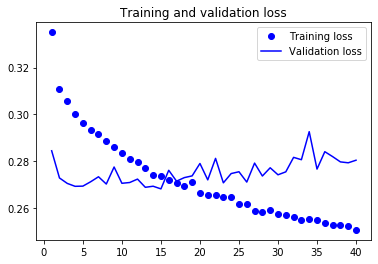

In [7]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 1D CNN 실행

from keras.datasets import imdb
from keras.preprocessing impor sequence

max_features = 10000
max_len = 500

print('데이터 로드...')
(x_train, y_train), (x_test, y_test)=imdb.load_data(num_words=max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train 크기:', x_train.shape)
print('x_text 크기:' x_test.shape)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model= Model(input_tensor, output_tensor)
model.summary()

In [ ]:
import keras

callbacks_list = [ # fit() 메서드의 callbacks 매개변수를 사용하여 콜백의 리스트를 모델로 전달. 몇 개의 콜백이라도 전달 가능.
    
    keras.callbacks.EarlyStopping( # 성능이 더 향상되지 않으면 훈련 중지
        monitor='val_acc',
        patience=1,
    )
    keras.callbacks.ModelCheckpoint(
        filepath = 'my_model.h5',
        monitor = 'val_loss',
        save_best_only=True,
    )
]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x,y, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(x_val, y_val))